In [9]:
# install required packages

#!pip install --upgrade pip
#!pip install --upgrade nltk
#!pip install --upgrade wordcloud

In [10]:
import pandas as pd
import numpy as np
import re 
import string 
import warnings
import re
from wordcloud import WordCloud
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
%matplotlib inline
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajaykumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
columns = ['target','ids','date','query','user','text']
encoding = "ISO-8859-1"
df = pd.read_csv('twitter_data.csv', encoding=encoding, names=columns)
df.tail(5)

,target,ids,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [12]:
# Getting Null Values Count
np.sum(df.isnull().any(axis=1))

0

In [13]:
# Getting Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   query   1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [14]:
# Postive review is marked as 4, changing it to 1 and Negative review is 0.
df['target'] = df['target'].replace(4,1)

Negative    800000
Positive    800000
Name: target, dtype: int64


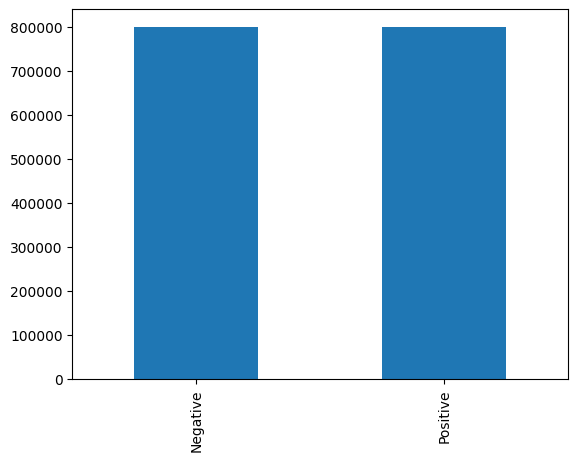

In [15]:
# Visualising the distribution of the target variable.

sentiment = {0:"Negative", 1:"Positive"}
print(df.target.apply(lambda x: sentiment[x]).value_counts())
df.target.apply(lambda x: sentiment[x]).value_counts().plot(kind = 'bar')
plt.show()

In [16]:
data = df[['text','target']]

In [17]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

data_pos = data_pos.iloc[:int(50000)]
data_neg = data_neg.iloc[:int(50000)]

dataset = pd.concat([data_pos, data_neg])

print(len(dataset))
dataset.head(2)

100000


,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1


In [18]:
# Converting to Lower case
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

49995    @mileycyrus so i have the same insomnia prob a...
49996    20 mintues late for my meeting starting @ 8  h...
49997    @kentucky_derby super excited! are you tweetin...
49998    i want another day off!!!!  to much sh#t to do...
49999                 i just jacked up this umbrella cake 
Name: text, dtype: object

In [21]:
#Removing stop words using nltk lib

#Tokenization of text
tokenizer = ToktokTokenizer() 

#Setting English stopwords
stopword_list = nltk.corpus.stopwords.words('english')

#Removing standard english stopwords like prepositions, adverbs
stop = set(stopwords.words('english'))
print("NLTK stop word lists \n")
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

NLTK stop word lists 

{'ain', 'any', 'y', 'there', 'who', 'a', 'mightn', 'between', 'yourselves', 'myself', 'm', "aren't", 'own', 'its', 'doesn', 'all', 'what', 'my', 'of', 'during', 's', 'been', 've', "you've", 'most', 'do', 'each', 'their', 'other', 'yours', 'be', 'after', 'few', 'for', 'into', 'too', "shan't", 'you', 'hers', 'with', 'over', 'it', 'more', 'than', 'then', 'were', 'out', 'if', 'don', 'ma', "needn't", "don't", 'was', 'again', 'or', 'while', 'at', 'just', 'd', 'have', 'when', 'down', 'his', 'shan', 'now', 'them', 'mustn', 'up', 'wouldn', 'in', "won't", 'didn', 'very', 'from', 'some', 'only', 'they', 'before', "hasn't", 'wasn', 'themselves', 'her', 'does', 'needn', 'our', 'under', 'did', 'about', 'himself', 'haven', 'weren', 'doing', 'hadn', 'by', "you're", 'where', 'this', "should've", 'yourself', 'above', 'll', 'being', 'until', 'that', 'to', "couldn't", 'which', "shouldn't", 'but', 'no', 'because', 'nor', 'the', "that'll", 'same', 're', 'why', "doesn't", 'on', 'can', 

In [22]:
dataset['text'] = dataset['text'].apply(remove_stopwords)
dataset['text'].tail()

49995    @mileycyrus insomnia prob slept 3 hrs woke 5am...
49996    20 mintues late meeting starting @ 8 ' know go...
49997    @kentucky_derby super excited ! tweeting event...
49998    want another day ! ! ! ! much sh#t today. got ...
49999                                 jacked umbrella cake
Name: text, dtype: object

In [23]:
# removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

800000              love @health4uandpets u guys r best ! !
800001    im meeting one besties tonight ! cant wait ! !...
800002    @darealsunisakim thanks twitter add , sunisa !...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [24]:
# removing numbers 

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

800000               love @healthuandpets u guys r best ! !
800001    im meeting one besties tonight ! cant wait ! !...
800002    @darealsunisakim thanks twitter add , sunisa !...
800003    sick really cheap hurts much eat real food plu...
800004                       @lovesbrooklyn effect everyone
Name: text, dtype: object

In [25]:
# fucntion to removes pattern in the input text.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [26]:
# remove twitter handles (@user)

dataset['text'] = np.vectorize(remove_pattern)(dataset['text'], "@[\w]*")
dataset.head()

,text,target
800000,love u guys r best ! !,1
800001,im meeting one besties tonight ! cant wait ! !...,1
800002,"thanks twitter add , sunisa ! got meet hin sh...",1
800003,sick really cheap hurts much eat real food plu...,1
800004,effect everyone,1


In [27]:
# remove special characters, numbers and punctuations

dataset['text'] = dataset['text'].str.replace("[^a-zA-Z#]", " ")
dataset.head()

,text,target
800000,love u guys r best,1
800001,im meeting one besties tonight cant wait ...,1
800002,thanks twitter add sunisa got meet hin sh...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,effect everyone,1


In [28]:
# remove short words

dataset['text'] = dataset['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
dataset.head()

,text,target
800000,love guys best,1
800001,meeting besties tonight cant wait girl talk,1
800002,thanks twitter sunisa meet show area sweetheart,1
800003,sick really cheap hurts much real food plus fr...,1
800004,effect everyone,1


In [29]:
# Tokenizing the text

tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000                                   [love, guys, best]
800001    [meeting, besties, tonight, cant, wait, girl, ...
800002    [thanks, twitter, sunisa, meet, show, area, sw...
800003    [sick, really, cheap, hurts, much, real, food,...
800004                                   [effect, everyone]
Name: text, dtype: object

In [30]:
# Applying Stemming

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000                                   [love, guys, best]
800001    [meeting, besties, tonight, cant, wait, girl, ...
800002    [thanks, twitter, sunisa, meet, show, area, sw...
800003    [sick, really, cheap, hurts, much, real, food,...
800004                                   [effect, everyone]
Name: text, dtype: object

In [31]:
# Applying Lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' ' .join(text)
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ajaykumar/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ajaykumar/nltk_data...


,text,target
800000,love guy best,1
800001,meeting besties tonight cant wait girl talk,1
800002,thanks twitter sunisa meet show area sweetheart,1
800003,sick really cheap hurt much real food plus fri...,1
800004,effect everyone,1


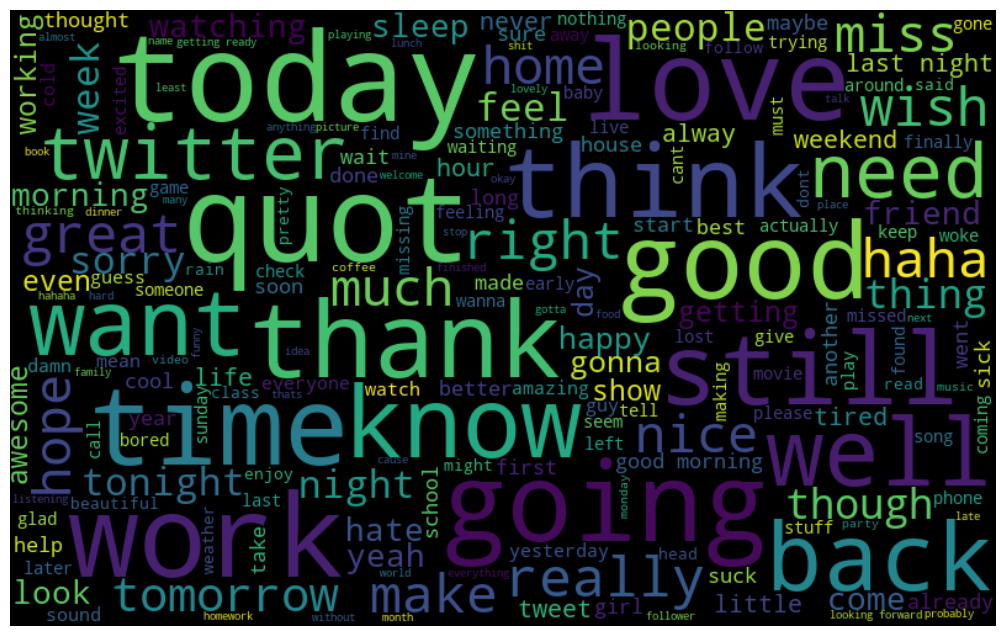

In [32]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in dataset['text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

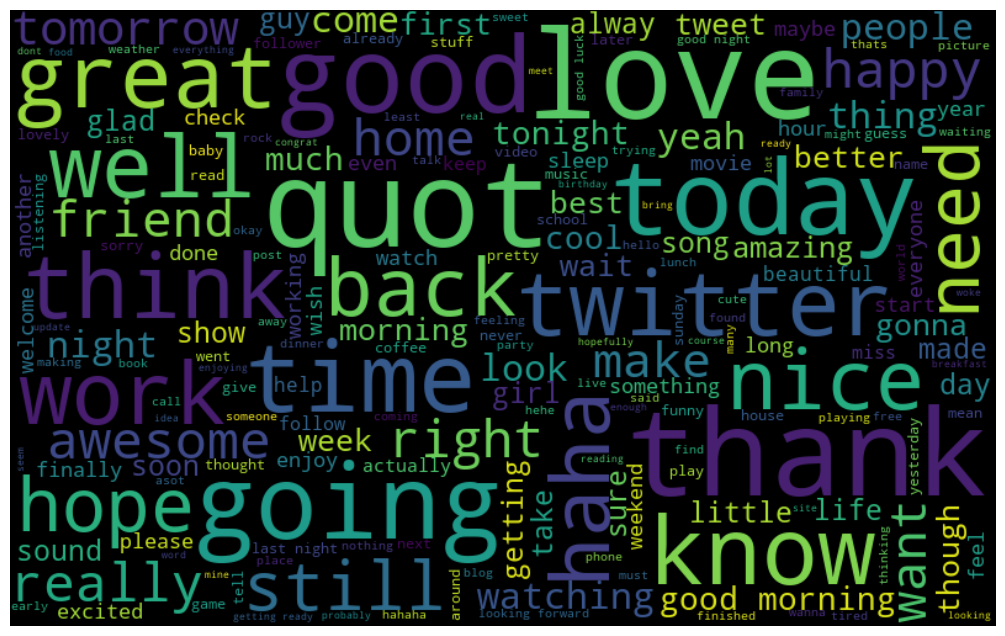

In [33]:
# frequent words visualization for +ve

all_words = " ".join([sentence for sentence in dataset['text'][dataset['target']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

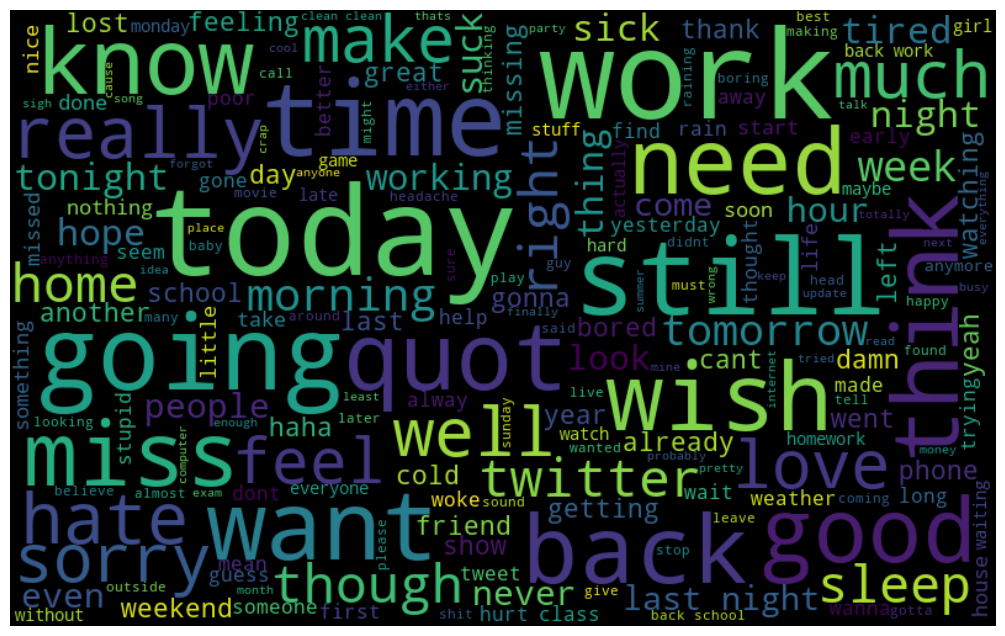

In [34]:
# frequent words visualization for -ve

all_words = " ".join([sentence for sentence in dataset['text'][dataset['target']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()